In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import scipy.stats as stats


rush2010 = pd.read_csv('data/Rushing_2010.csv')
rush2011 = pd.read_csv('data/Rushing_2011.csv')
rush2012 = pd.read_csv('data/Rushing_2012.csv')
rush2013 = pd.read_csv('data/Rushing_2013.csv')
rush2014 = pd.read_csv('data/Rushing_2014.csv')
rush2015 = pd.read_csv('data/Rushing_2015.csv')
rush2016 = pd.read_csv('data/Rushing_2016.csv')
rush2017 = pd.read_csv('data/Rushing_2017.csv')
rush2018 = pd.read_csv('data/Rushing_2018.csv')
rush2019 = pd.read_csv('data/Rushing_2019.csv')
rush_lst = [rush2010, rush2011, rush2012,rush2013,rush2014,rush2015,rush2016,rush2017,rush2018,rush2019]
rush2010.dtypes

Player     object
Tm         object
Age         int64
Pos        object
G           int64
GS          int64
Att         int64
Yds         int64
TD          int64
1D          int64
Lng         int64
Y/A       float64
Y/G       float64
Fmb         int64
Height     object
Weight     object
dtype: object

In [3]:
def height_val(s):
    feet, inches = s.split('-')
    return int(feet)*12 + int(inches)

height_val('6-0')

72

In [6]:
rush2010.size
# rush2010.head()

1184

In [7]:
for df in rush_lst:
    
    df['Height'] = df.Height.apply(height_val)
    df['Weight'] = df.Weight.str.slice(0,3).astype(float)
    df['BMI'] = 703 * df['Weight']/((df['Height'])**2)
    df.sort_values(by='Height', inplace=True)

In [9]:
past_decade = pd.concat(rush_lst)
past_decade

,Player,Tm,Age,Pos,G,GS,Att,Yds,TD,1D,Lng,Y/A,Y/G,Fmb,Height,Weight,BMI
71,Darren Sproles,SDG,27,NaN,16,3,50,267,0,10,34,5.3,16.7,3,66,190.0,30.663453
7,Maurice Jones-Drew*,JAX,25,RB,14,14,299,1324,5,74,37,4.4,94.6,2,67,210.0,32.887057
39,Justin Forsett,SEA,25,rb,16,5,118,523,2,24,32,4.4,32.7,0,68,195.0,29.646410
47,Danny Woodhead,2TM,25,NaN,15,3,97,547,5,0,36,5.6,36.5,1,69,200.0,29.531611
57,Jerome Harrison,2TM,27,NaN,12,2,71,330,1,0,50,4.6,27.5,2,69,205.0,30.269901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Derrick Henry *,TEN,25,RB,15,15,303,1540,16,73,74,5.1,102.7,5,75,247.0,30.869511
69,Jameis Winston,TAM,25,QB,16,16,59,250,1,18,26,4.2,15.6,12,76,231.0,28.115132
71,Jacoby Brissett,IND,27,QB,15,15,56,228,4,20,24,4.1,15.2,7,76,238.0,28.967105
65,Carson Wentz,PHI,27,QB,16,16,62,243,1,21,19,3.9,15.2,16,77,237.0,28.101029


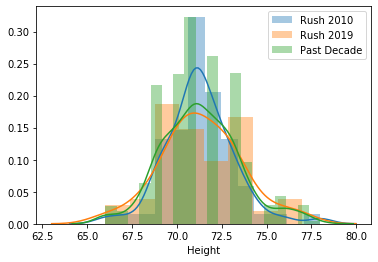

In [12]:
sns.distplot(rush2010.Height, label='Rush 2010')
sns.distplot(rush2019.Height, label='Rush 2019')
sns.distplot(past_decade.Height, label='Past Decade')
plt.legend()
plt.show()

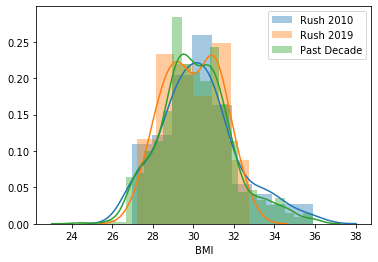

In [13]:
sns.distplot(rush2010.BMI, label='Rush 2010')
sns.distplot(rush2019.BMI, label='Rush 2019')
sns.distplot(past_decade.BMI, label='Past Decade')
plt.legend()
plt.show()

Ttest_indResult(statistic=-13.071472879994339, pvalue=2.4252426917019184e-26)

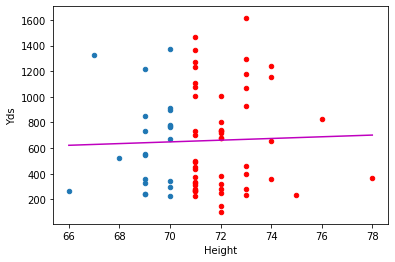

In [15]:
ax = rush2010[rush2010.Height<=70].plot.scatter('Height', 'Yds')
rush2010[rush2010.Height>70].plot.scatter('Height', 'Yds',ax=ax, c='r')
m, b, _,_,_=stats.linregress(rush2010.Height,rush2010.Yds)
x=numpy.linspace(rush2010.Height.min(),rush2010.Height.max(),2)
y=m*x +b
ax.plot(x,y,c='m')


In [17]:
short = rush2010[rush2010.Height<=70]
tall = rush2010[rush2010.Height>70]
stats.ttest_ind(short.Yds, tall.Yds)

Ttest_indResult(statistic=-0.14370860530270088, pvalue=0.8861320383376212)

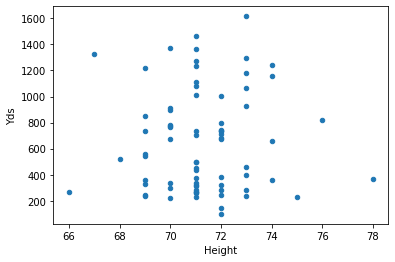

In [18]:
rush2010.plot.scatter('Height', 'Yds')

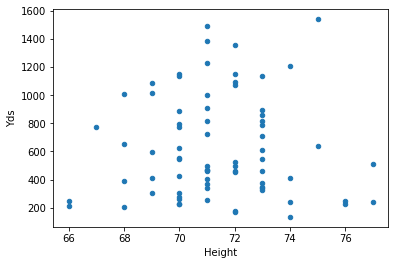

In [19]:
rush2019.plot.scatter('Height', 'Yds')